In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from support import get_features, plot_learning_curves

%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

In [294]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
print(data.shape)
col = list(data.columns.values)

(1169, 75)


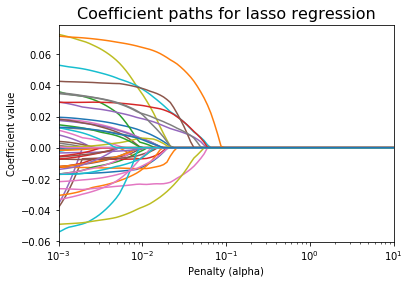

In [295]:
def plot_coef_path(estimator, X, y, alpha, ax=None):
    if ax is None:
        ax = plt.figure().gca()
    coefs = np.zeros((X.shape[1], len(alpha)))
    for (i, a) in enumerate(alpha):
        coefs[:,i] = estimator(alpha=a).fit(X, y).coef_
    ax.plot(alpha, coefs.T)
    ax.set_xlabel("Penalty (alpha)")
    ax.set_ylabel("Coefficient value")
    ax.set_xscale('log')
    
#    sax = fig.add_subplot(1, 1, 1)
#    sax.legend()
#    handles, labels = ax.get_legend_handles_labels()
#    ax.legend(handles, labels)
    return coefs

# separate some features
gender, age, sub_use = get_features(data, 'Gender_recoded', 'Age_recoded', 'sub_use')
# age, sub_use = get_features(data, 'Age_recoded', 'sub_use')
del data['Gender_recoded']
del col[col.index("Gender_recoded")]
del data['Age_recoded']
del col[col.index("Age_recoded")]
del data['Subject']
del col[col.index("Subject")]
del data['sub_use']
del col[col.index("sub_use")]

# separating genders
# dfm = data[data['Gender_recoded'] == 0]
# dff = data[data['Gender_recoded'] == 1]

# sub_usem = get_features(dfm, 'sub_use')
# sub_usef = get_features(dff, 'sub_use')
# sbm = pd.Series(sub_usem)
# sbf = pd.Series(sub_usef)
# print(sbm)
# print(sbm.shape)


# del dfm['Gender_recoded']
# del dff['Gender_recoded']
# del col[col.index("Gender_recoded")]
# del dfm['sub_use']
# del dff['sub_use']
# del col[col.index("sub_use")]


# Note: we standardize our features to mean-zero and unit-variance,
# because lasso and ridge are sensitive to scale.
# facets = scale(facets)
data = scale(data)
# dfm = scale(dfm)
# dff = scale(dff)

# Coefficient paths for ridge regression, predicting age from 30 facets
alpha = np.logspace(-3, 1, 100)
# plot_coef_path(Lasso, facets, age, alpha)
coefx = plot_coef_path(Lasso, data, sub_use, alpha)
# coefxm = plot_coef_path(Lasso, dfm, sbm, alpha)
# coefxf = plot_coef_path(Lasso, dff, sbf, alpha)


plt.title("Coefficient paths for lasso regression", fontsize=16)
plt.xlim(1e-3, 10);

In [296]:
# organize lasso results
zero_sum = (coefx == 0).sum(axis=1)
col_np = np.asarray(col)
# con_zero_col = np.concatenate([zero_sum, col_np], axis=0)
con_zero_col = pd.DataFrame([zero_sum], index = ['row1'], columns = col_np)
con_zero_col_T = con_zero_col.T
out_sort = con_zero_col_T.sort_values('row1',ascending=True)
print(out_sort)

                       row1
AngAggr_Unadj            51
FearSomat_Unadj          55
AngAffect_Unadj          55
VSPLOT_TC                56
VSPLOT_OFF               56
NEOFAC_C                 57
NEOFAC_O                 57
SelfEff_Unadj            60
DDisc_SV_6mo_200         65
PSQI_Score               66
DDisc_SV_1yr_40K         66
PosAffect_Unadj          66
Friendship_Unadj         67
DDisc_SV_1mo_200         67
ER40HAP                  67
DDisc_SV_3yr_200         68
DDisc_SV_10yr_40K        69
ER40ANG                  69
SCPT_TP                  69
NEOFAC_E                 69
IWRD_TOT                 70
IWRD_RTC                 70
CardSort_AgeAdj          71
Loneliness_Unadj         71
MeanPurp_Unadj           72
DDisc_SV_1yr_200         73
SCPT_LRNR                73
PMAT24_A_SI              74
EmotSupp_Unadj           75
LifeSatisf_Unadj         75
...                     ...
PicSeq_AgeAdj            86
SCPT_SEN                 87
InstruSupp_Unadj         87
DDisc_SV_10yr_200   

In [ ]:
# # organize lasso results
# zero_summ = (coefxm == 0).sum(axis=1)
# col_np = np.asarray(col)
# # con_zero_col = np.concatenate([zero_sum, col_np], axis=0)
# con_zerom_col = pd.DataFrame([zero_summ], index = ['row1'], columns = col_np)
# con_zerom_col_T = con_zerom_col.T
# out_sortm = con_zerom_col_T.sort_values('row1',ascending=True)
# print(out_sortm)

# # organize lasso results
# zero_sumf = (coefxf == 0).sum(axis=1)
# col_np = np.asarray(col)
# # con_zero_col = np.concatenate([zero_sum, col_np], axis=0)
# con_zerof_col = pd.DataFrame([zero_sumf], index = ['row1'], columns = col_np)
# con_zerof_col_T = con_zerof_col.T
# out_sortf = con_zerfo_col_T.sort_values('row1',ascending=True)
# print(out_sortf)